我们提供了复现Figure 5数据处理结果所需的R代码。

We provide the R script needed to reproduce analyze results of Case 1 (Figure 5), significant cell-cell interactions of Heat-Shocked Root Cells in Arabidopsis thaliana

In [ ]:
# 载入需要的R包
# Load the required packages
library(Seurat)
library(tidyverse)
library(ggplot2)
library(ggsci)
library(ggpubr)
library(pheatmap)
library(RColorBrewer)
library(patchwork)
library(lsa)
library(viridis)
library(hrbrthemes)
library(circlize)
library(chorddiag)
library(ggplotify)
library(data.table)
library(parmigene)
library(readxl)
library(infotheo)
library(igraph)
library(muxViz)
library(rgl)

In [3]:
#载入由using_example.ipynb脚本预处理好的单细胞数据 
# load the processed scRNA-seq dataset based on using_example.ipynb
objs <- readRDS("D:\\project\\PlantPhoneDB\\datasets\\GSE121619.rds")

In [4]:
# metadata information
objs@meta.data$geo_accession <- ifelse(objs@meta.data$orig.ident=="Control1","GSM4466787",ifelse(objs@meta.data$orig.ident=="Control2",'GSM4466788','GSM4466789'))

In [5]:
objs@meta.data$treatment[objs@meta.data$treatment %in% c("Control1","Control2")] <- "Control"

In [6]:
# 为每个细胞簇设置相应的颜色
# Colors used to represent different cell types.
mycolor <- c("pink","purple","lightblue","#6495ED","lightgreen","tan1","darkred","salmon","#6B8E23")

# Figure 5A

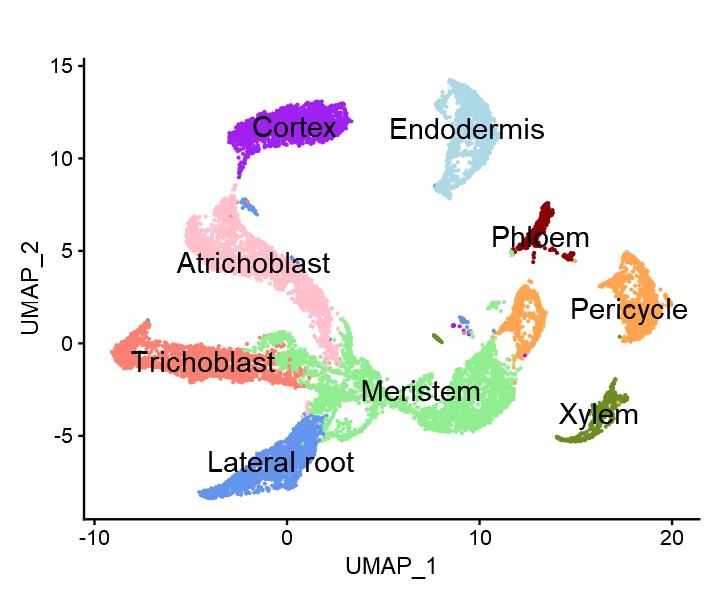

In [7]:
# 可视化GSE121619数据集，每一种颜色代表一个细胞簇
# UMAP plot of GSE121619 dataset with cells colored by Atrichoblast, Cortex, 
# Endodermis, Lateral root, Meristem, Pericycle, Phloem, Trichoblast and Xylem cell types.
options(repr.plot.width=6, repr.plot.height=5)
pic1 <- DimPlot(objs,group.by = 'labels', label=TRUE, label.size = 6, reduction='umap',
               cols=mycolor)+
    NoLegend()+ggtitle("")
pic1

In [ ]:
#pdf('Figure5/Figure5A.pdf',width=6,height=5)
#pic1
#dev.off()

# Figure S5A

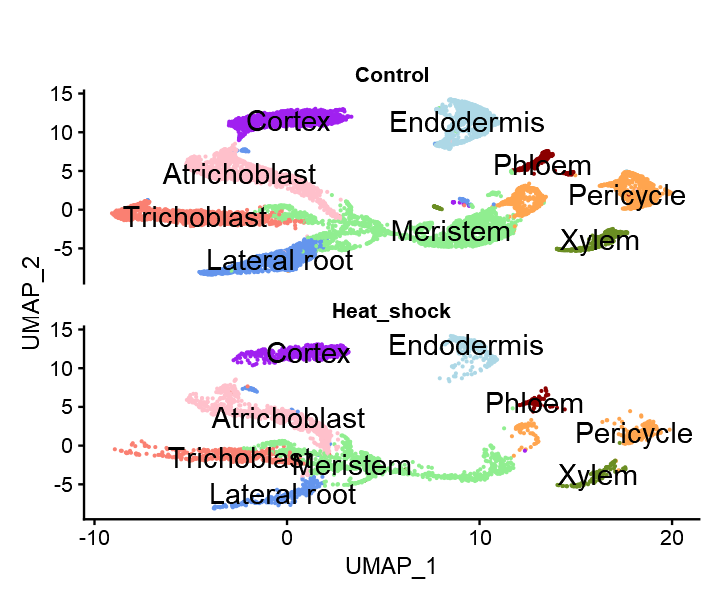

In [8]:
# 可视化GSE121619数据集，每一种颜色代表一个细胞簇，展示热处理组和对照组的细胞分簇
# UMAP visualization of separated of control and heat shock stress sample of Arabidopsis single cells (GSE121619), 
# showing the formation of 9 cell types.
options(repr.plot.width=6, repr.plot.height=5)
pics1 <- DimPlot(objs,group.by = 'labels', split.by= 'treatment', label=TRUE, label.size = 6,
       cols=mycolor,ncol =1)+
    NoLegend()+ggtitle("")
pics1

In [ ]:
#pdf('Figure5/FigureS5A.pdf',width=8,height=5)
#pics1
#dev.off()

# Figure S5B

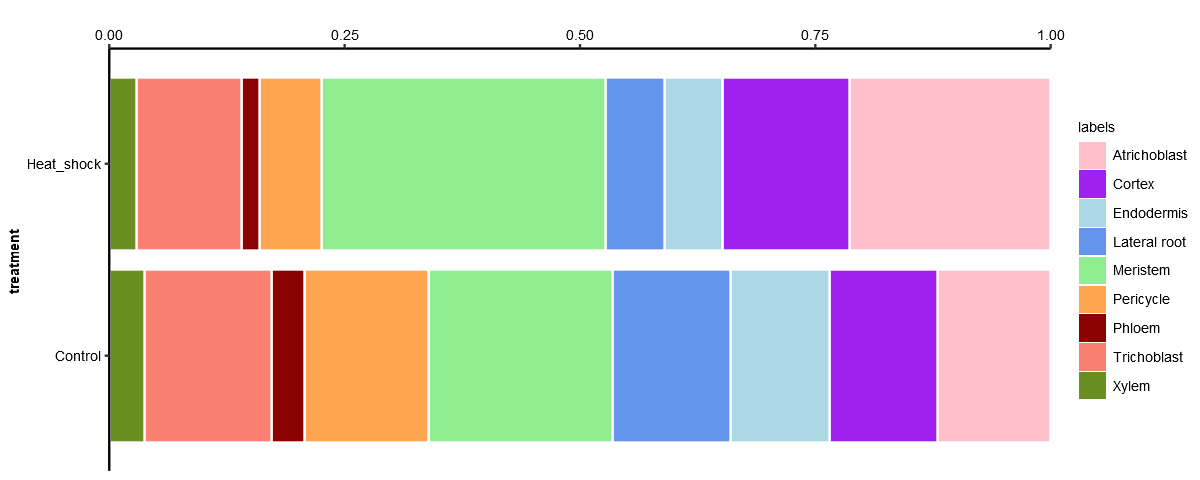

In [9]:
# 计算热处理组和对照组的细胞比例
# Proportion of 9 cell types under control and heat shock stress. Atrichoblast cells, Meristem cells and Cortex cells 
# showed higher cell proportion in response to heat-shock stress.
options(repr.plot.width=10, repr.plot.height=4)
pics2 <- objs@meta.data %>%
    ggplot(aes(treatment,fill=labels,color=I('white')))+
        geom_bar(position = "fill")+
        coord_flip()+
        theme_bw()+
        ylab("")+
        theme(panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              panel.border=element_blank(),
              axis.title=element_text(size=7.82,face="bold"),
              axis.text=element_text(size=7.82,color='black'),
              legend.text=element_text(size=7.82),
              plot.title = element_text(size = 7.82, face = "bold"),
              axis.line=element_line(color='black'),
              legend.title = element_text(size = 7.82))+
        scale_y_continuous(position = "right",expand = c(0,0))+
        scale_fill_manual(values=mycolor)
pics2

In [ ]:
#pdf('Figure5/FigureS5B.pdf',width=8,height=5)
#pics2
#dev.off()

In [10]:
tbl <- table(objs@meta.data$labels,objs@meta.data$treatment)

In [11]:
res = chisq.test(tbl)

In [12]:
expected = res$expected
roe = tbl/expected

In [13]:
tbl

              
               Control Heat_shock
  Atrichoblast    1427        828
  Cortex          1356        522
  Endodermis      1249        238
  Lateral root    1489        245
  Meristem        2317       1166
  Pericycle       1562        256
  Phloem           411         76
  Trichoblast     1603        430
  Xylem            441        113

# Figure 5C

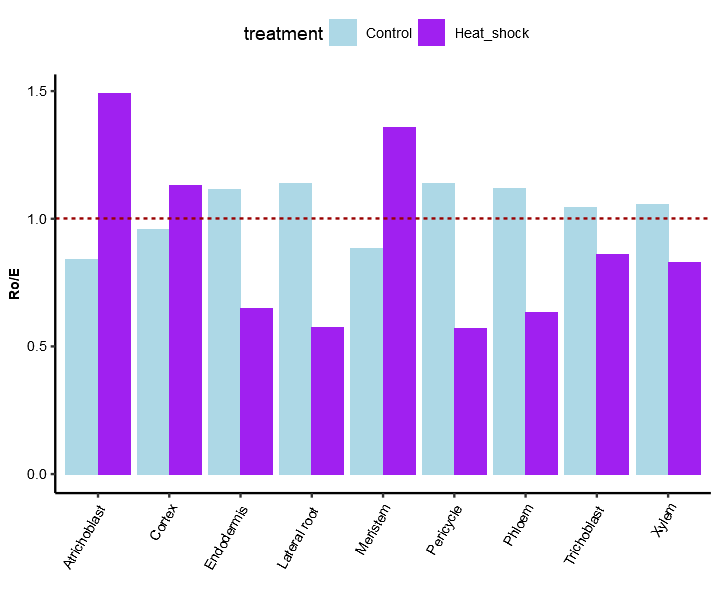

In [14]:
# 运用fisher检验热处理下细胞响应胁迫的偏好性
# Preference of each cell type under heat shock stress. RO/E above 1 indicates enrichment.
options(repr.plot.width=6, repr.plot.height=5)
pic2 <- roe %>%
    as.data.frame() %>%
    select(Cell=Var1, treatment= Var2, roe=Freq) %>%
    ggplot(aes(Cell,roe,fill=treatment))+
        geom_bar(stat='identity',position='dodge')+
    ylab('Ro/E')+xlab('')+
    theme_classic()+
                theme(axis.title=element_text(size=7.82,face="bold"),
                     axis.text=element_text(size=7.82,color='black'),
                     axis.text.x=element_text(angle=60,hjust=1),
                     legend.text=element_text(size=7.82),
                     plot.title = element_text(size = 7.82, face = "bold",color='black'),
                     legend.position="top")+
            geom_hline(aes(yintercept=1), colour="#990000",linetype="dashed")+
            scale_fill_manual(values=c("lightblue", "purple"))
pic2

In [15]:
# 寻找差异基因
# differentially expressed genes
DEG <- FindAllMarkers(objs,
                        logfc.threshold=0.25,
                        min.diff.pct = 0.25,
                        max.cells.per.ident = 10000,
                        only.pos=T)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18



In [16]:
# 下载已知的标记基因做细胞注释
# cell type annotation using known marker genes from plantscrnadb (http://ibi.zju.edu.cn/plantscrnadb/download.php)
signature <- readxl::read_excel('../mark genes/ath_doi_202104.xlsx')
sig_gene <- signature %>%
    as.data.frame() %>%
    filter(Tissue=='Root') %>%
    mutate(V1=`Cell Type`,V2=Cell_Marker) %>%
    unique(.) %>%
    select(V1,V2)

In [17]:
meta <- objs@meta.data %>%
            select(seurat_clusters,labels) %>%
            unique()

In [18]:
mark_gene <- DEG %>%
    mutate(avg_logFC=avg_log2FC) %>%
    filter(p_val_adj<0.05 & avg_log2FC>1.5 & gene %in% sig_gene$V2) %>%
    inner_join(meta,c("cluster" = "seurat_clusters")) %>%
    arrange(p_val)

In [19]:
Idents(objs) <- objs$labels

In [20]:
expr <- AverageExpression(objs,assays ='SCT')
expr <- expr$SCT
expr <- expr[mark_gene$gene,]

In [21]:
expr <- expr[,c('Trichoblast','Lateral root','Cortex','Atrichoblast','Endodermis','Xylem','Meristem','Phloem','Pericycle')]

# Figure5B

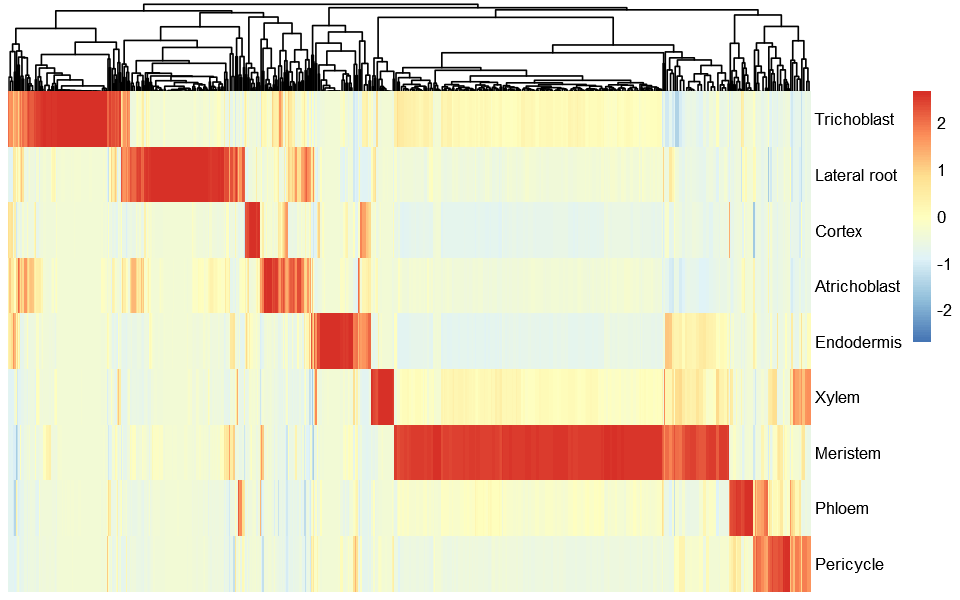

In [22]:
#MAESTRO软件的细胞类型注释结果的热图展示
#The mean expression of signature genes for each cell type annotated by MAESTRO software.
#Low and high gene expression level are showed by blue and red, respectively.
options(repr.plot.width=8, repr.plot.height=5)
pic3 <- pheatmap(t(expr), scale="column",angle_col=90,
         cluster_rows = F,cluster_cols = T,show_colnames=F)

In [23]:
# 载入PlantPhoneDB
# load functions from PlantPhoneDB R package. https://plantphonedb.readthedocs.io/en/latest/08-Software.html
source("../PlantPhoneDB/LRscore.r")
source("../PlantPhoneDB/heatmap_count.r")
source("../PlantPhoneDB/CCI_circle.r")
source("../PlantPhoneDB/LR_pathway.r")
source("../PlantPhoneDB/LRTargetFisher.R")

In [24]:
# 配体-受体互作数据集
# A dataset with ligand-receptor pairs from https://jasonxu.shinyapps.io/PlantPhoneDB/
load("../LR_pair_ath.RDa")
LR_pair <- LR_pair %>%
    filter(source!="orthologs") %>%
    select(Ligands, Receptors) %>%
    unique()

In [25]:
objs_heat <- subset(objs, treatment!="Control")

In [26]:
# 计算配体-受体互作的分数
# Score ligand-receptor interactions
Heat <- LRscore(objs_heat@assays$SCT@data, LRdb=LR_pair, cluster = Idents(objs_heat), min.pct = 0.1,iterations=100, method='Average')

In [27]:
# 寻找每个细胞簇的差异基因
# differentially expressed genes for each cell group
DE_test <- NULL
for(i in unique(objs$labels)){
    objs_flt <- subset(objs,labels==i)
    Idents(objs_flt) <- objs_flt$treatment
    degs <- FindAllMarkers(objs_flt,
                        logfc.threshold=0.25,
                        min.diff.pct = 0.25,
                        max.cells.per.ident = 10000)
    degs <- degs %>%
        mutate(avg_logFC=avg_log2FC, labels=i) %>%
        filter(p_val_adj<0.05) %>%
                mutate(label_gene=paste0(labels,"_",gene))
    DE_test <- rbind(DE_test,degs)
}

Calculating cluster Control

Calculating cluster Heat_shock

Calculating cluster Control

Calculating cluster Heat_shock

Calculating cluster Control

Calculating cluster Heat_shock

Calculating cluster Control

Calculating cluster Heat_shock

Calculating cluster Control

Calculating cluster Heat_shock

Calculating cluster Control

Calculating cluster Heat_shock

Calculating cluster Control

Calculating cluster Heat_shock

Calculating cluster Control

Calculating cluster Heat_shock

Calculating cluster Control

Calculating cluster Heat_shock



In [28]:
# 识别热胁迫下显著差异的配体-受体互作对
# identify the significant interactions
Heat_sig <- Heat %>%
    filter(Pvalue<0.05) %>%
    mutate(Ligands_cell_gene=paste0(Ligands_cell,"_",Ligands), Receptors_cell_gene=paste0(Receptors_cell,"_",Receptors)) %>%
    filter(Ligands_cell_gene %in% DE_test$label_gene | Receptors_cell_gene %in% DE_test$label_gene)  %>%
    select(-Ligands_cell_gene,-Receptors_cell_gene)

In [ ]:
#write.csv(Heat_sig,"../Table S8.csv",row.names=F)

In [ ]:
#Heat_sig <- read.csv("../Table S8.csv",skip=1,header=T)

In [29]:
# 识别热胁迫下显著差异的1640配体-受体互作对
# Identification of 1,640 significant ligand-receptor pairs between pairwise cell types on GSE121619 dataset.
interaction_count <- Heat_sig%>%
    group_by(Ligands_cell,Receptors_cell) %>%
    summarise(Number=n(),.groups = 'drop')

In [30]:
sum(interaction_count$Number)

[1] 1640

In [31]:
# 1,457 paracrine ligand-receptor pairs and 183 autocrine ligand-receptor pairs
interaction_count %>%
    mutate(Type=ifelse(Ligands_cell==Receptors_cell,"Autocrine","Paracrine")) %>%
    group_by(Type) %>%
    summarise(Number=sum(Number))

Type      Number
1 Autocrine  183  
2 Paracrine 1457

In [32]:
Autocrine <- interaction_count[interaction_count$Ligands_cell==interaction_count$Receptors_cell,]

In [33]:
Paracrine <- interaction_count[interaction_count$Ligands_cell!=interaction_count$Receptors_cell,]

# Figure5SC Figure5SD 

In [34]:
pics3 <- as.grob(~CCI_circle(Paracrine, mycolor))
pics4 <- as.grob(~CCI_circle(Autocrine, mycolor))

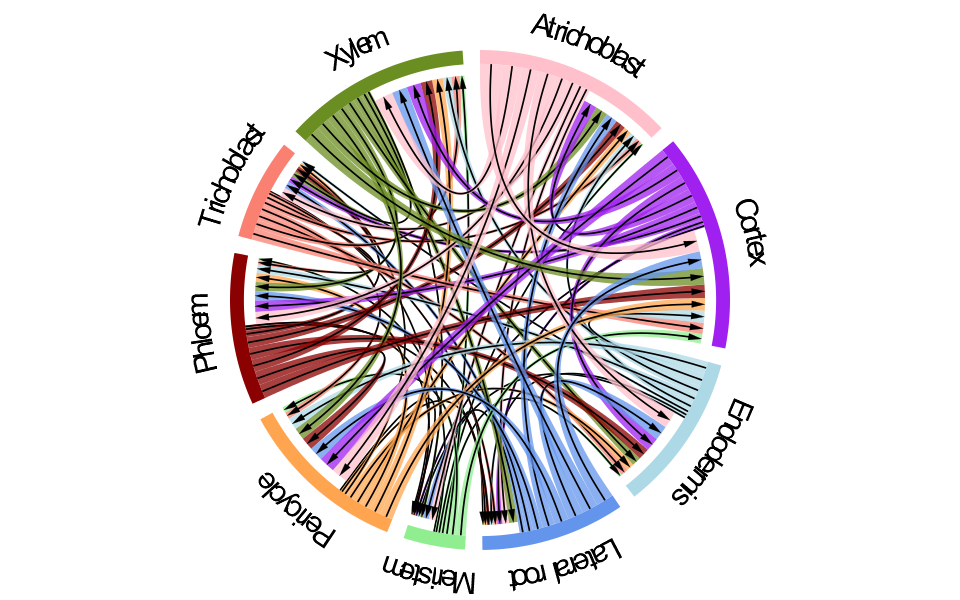

In [35]:
# Chord diagram of cell-cell communication of paracrine interactions.
CCI_circle(Paracrine, mycolor)

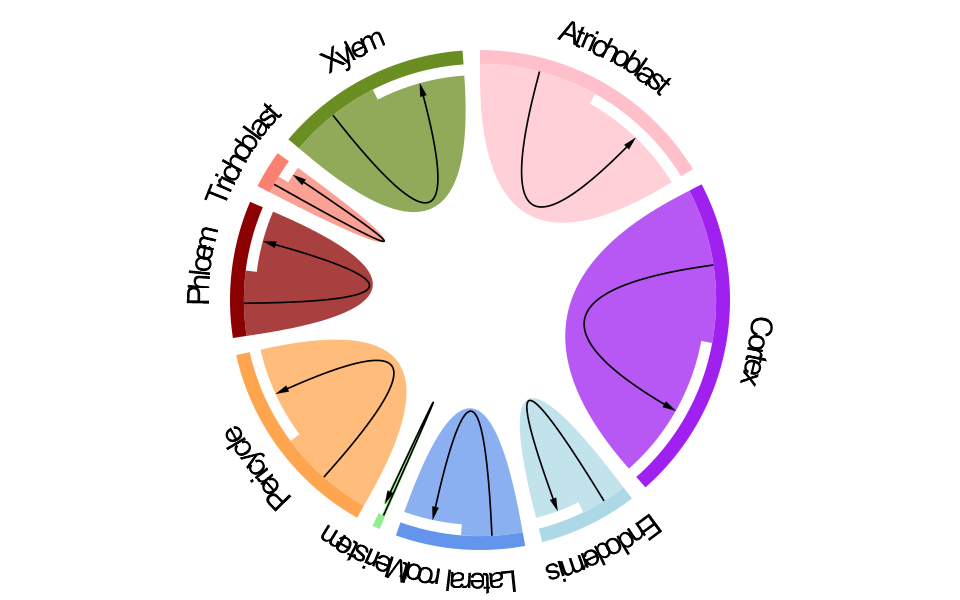

In [36]:
# Chord diagram of cell-cell communication of autocrine interactions.
CCI_circle(Autocrine, mycolor)

In [ ]:
#pdf('Figure5/FigureS5C.pdf',width=8,height=5)
#CCI_circle(Paracrine, mycolor)
#dev.off()

In [ ]:
#pdf('Figure5/FigureS5D.pdf',width=8,height=5)
#CCI_circle(Autocrine, mycolor)
#dev.off()

# Figure5SE

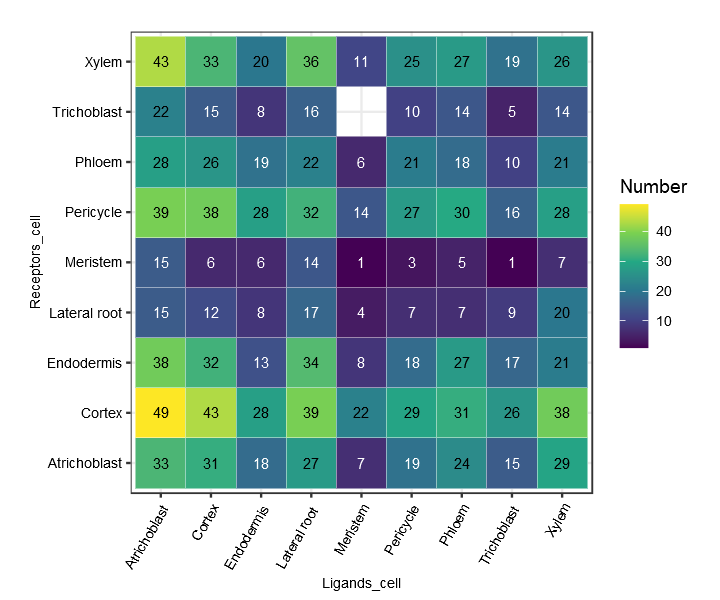

In [37]:
# Heatmap shows number of ligand-receptor interactions between pairwise cell type.
options(repr.plot.width=6, repr.plot.height=5)
heatmap_count(interaction_count,text_size=7.82,number_size=3,decimal=4,title="")

In [38]:
head(interaction_count)

Ligands_cell Receptors_cell Number
1 Atrichoblast Atrichoblast   33    
2 Atrichoblast Cortex         49    
3 Atrichoblast Endodermis     38    
4 Atrichoblast Lateral root   15    
5 Atrichoblast Meristem       15    
6 Atrichoblast Pericycle      39

In [ ]:
#pdf('Figure5/FigureS5E.pdf',width=8,height=5)
#heatmap_count(interaction_count,text_size=15,number_size=5,decimal=4)
#dev.off()

In [ ]:
#options(repr.plot.width=14, repr.plot.height=7)
#pics1/pics2+plot_layout(height=c(5,1))|(plot_spacer()/pics3/pics4+plot_layout(height=c(0,1,1)))|plot_spacer()/pics4

In [ ]:
#options(repr.plot.width=14, repr.plot.height=7)
#pdf("Figure5/FigureS5.pdf",width=14,height=7)
#pics1/pics2+plot_layout(height=c(6,1))|(plot_spacer()/pics3/pics4+plot_layout(height=c(0,1,1)))|plot_spacer()/pics4
#dev.off()

In [39]:
Top10 <- Heat_sig %>%
    arrange(desc(Score)) %>%
    select(LR_pair) %>%
    unique() %>%
    head(10) %>%
    inner_join(Heat) %>%
    select(LR_pair,Cell_pair,Score) %>%
    spread(.,Cell_pair,Score) %>%
    replace(is.na(.), 0)

Joining, by = "LR_pair"



In [40]:
rownames(Top10) <- Top10$LR_pair
Top10 <- Top10[,-1]
Top10 <- t(Top10)

In [41]:
Top10 <- apply(Top10,2,function(x){x/max(x)})

# Figure5E

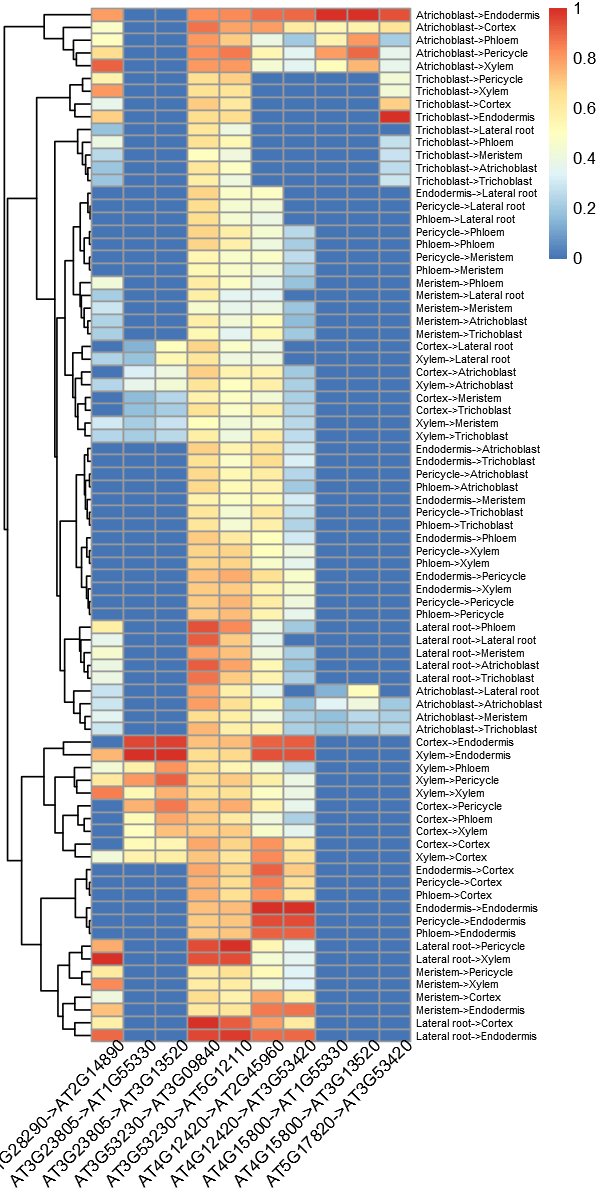

In [42]:
# Top 10 ligand-receptor pairs with P value < 0.05 show different regulatory pattern. Columns are scaled by max ligand-receptor expression.
options(repr.plot.width=5, repr.plot.height=10)
pic6 <- pheatmap(Top10, scale="none",angle_col=45,fontsize_row=6,
         cluster_rows = T,cluster_cols = F,show_colnames=T)

# Figure5D

In [ ]:
#pdf('Figure5/Figure5D.pdf')
#CCI_circle(interaction_count, mycolor)
#dev.off()

In [43]:
pic5 <- as.grob(~CCI_circle(interaction_count, mycolor))

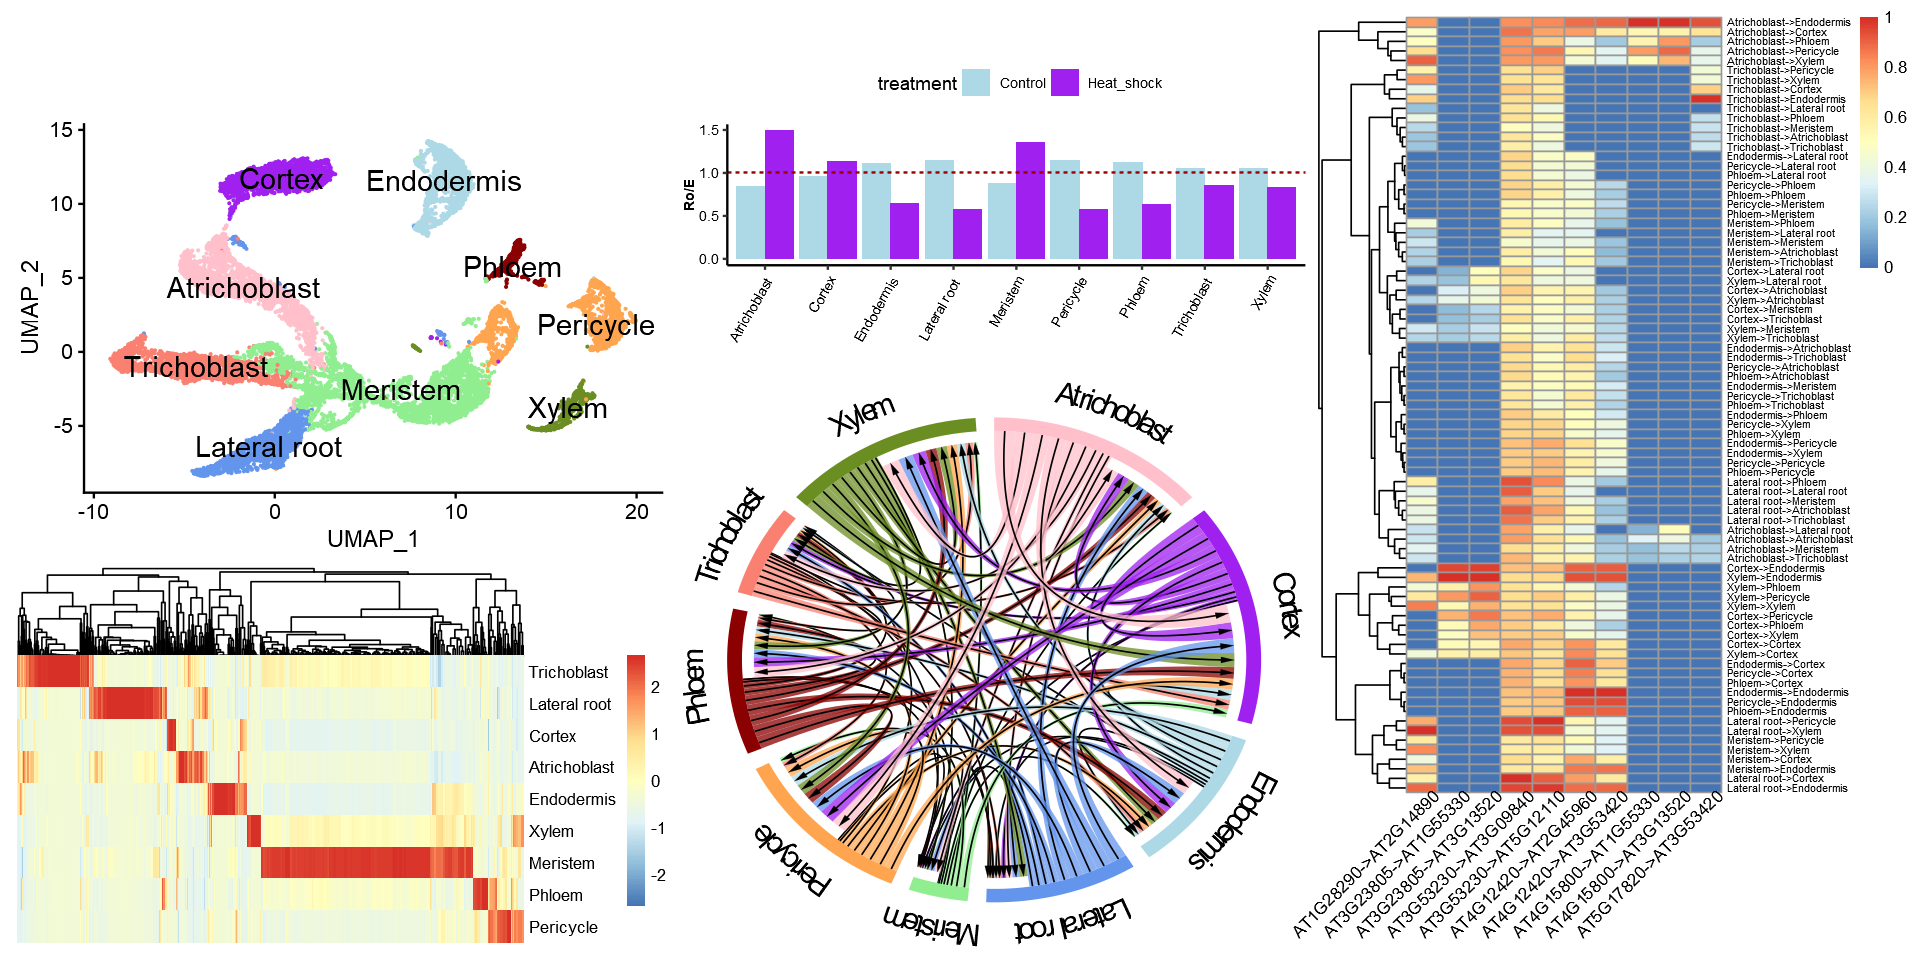

In [44]:
options(repr.plot.width=16, repr.plot.height=8)
(pic1/pic3$gtable+plot_layout(height=c(1,1))|(pic2/pic5+plot_layout(height=c(1,4))))|(pic6$gtable)

# Figure5

In [ ]:
#pdf("Figure5/Figure5.pdf",width=14,height=7)
#(pic1/pic3$gtable+plot_layout(height=c(1,1))|(pic2/pic5+plot_layout(height=c(1,4))))|(pic6$gtable)
#dev.off()

# Construction of intracellular signaling pathway

In [45]:
geneSet <- fread('../plantGSAD/Ara_ALL.KEGG.txt')
geneSet$Gene <- toupper(geneSet$Gene)

In [46]:
CellA <- "Atrichoblast"
CellB <- "Cortex"
lr <- subset(Heat_sig,Ligands_cell==CellA & Receptors_cell==CellB )

In [48]:
# Construction of intracellular signaling pathway
pathway_result2 <- LR_pathway(lr, objs_heat, CellA, CellB, neighbor=2, geneSet)

In [49]:
pathway_result2$FDR <- p.adjust(pathway_result2$Pvalue,method='BH')

In [50]:
pathway_result2 <- pathway_result2[order(pathway_result2$Pvalue),]

In [51]:
dim(pathway_result2)

[1] 1726    8

# Table S9

In [ ]:
#write.csv(pathway_result2,"../Table S9.csv",row.names=F)

In [52]:
pathway_result <- subset(pathway_result2,LR_pair=="AT1G28290->AT2G14890")

In [53]:
kk <- pathway_result %>%
    arrange(Pvalue) %>%
    head(1)

In [54]:
head(kk)

LR_pair              Cell_pair            Pathway       GeneRatio BgRatio  
1 AT1G28290->AT2G14890 Atrichoblast->Cortex KEGG_RIBOSOME 64/260    233/19638
  Pvalue      
1 4.370864e-67
  OverlapGene                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1 AT1G14320, AT1G22780, AT1G23290, AT1G26880, AT1G33120, AT1G33140, AT1G52300, AT1G56045, AT1G66580, AT1G67430, AT1G70600, AT1G77940, AT2G01250, AT2G19730, AT2G25210, AT2G32060, AT2G36620, AT2G39460, AT2G43460, AT2G47610, AT3G02080, AT3G02190, AT3G04840, AT3G05590, AT3G06700, AT3G11510, AT3G16080, AT3G18740, AT3G22230, AT3G23390, AT3G25520, AT3G28900, AT3G48930, AT3G53430, AT3G53890, AT3G55280, AT3G55750, AT3G56340, AT3G59540, AT3G60245, AT3G60770, AT3G61110, AT3G62870, AT4G00100, AT4G15000, AT4G17390, AT4G18100, AT4G31985, AT5G02960, AT5G03850, AT5G09510, AT5G16130, AT5G22440, AT5G27700, AT5G27770, AT5G27850, AT5G28060, AT5G39740, AT5G41520, AT5G47700, AT5G47930, AT5G56670, AT5G62300, AT5G64140
  FDR         
1 3.772056e-64

# Arena3D for visualization

In [55]:
needGene <- unique(unlist(str_split(kk$OverlapGene,",")))

In [56]:
LR <- data.frame(SourceNode="AT1G28290",TargetNode="AT2G14890",Weight=1,SourceLayer="Ligand",TargetLayer="Receptor")
LR_target <- data.frame(SourceNode="AT2G14890",TargetNode=needGene,Weight=1,SourceLayer="Receptor",TargetLayer="Targets")
LR <- rbind(LR,LR_target)

In [ ]:
#write.table(LR,"LR_test.txt",row.names=F,sep="\t",quote=F)